# Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../../Capstone/Data/FirstClean_NBA_Advanced_Data.csv')
data.head()

,Player,Pos,Age,Tm,G,MP,PER,3PAr,FTr,OWS,...,Season,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
0,Bam Adebayo,PF,22,MIA,65,2235,20.6,0.018,0.476,4.6,...,2019-20,0.606,8.7,25.0,17.2,23.6,1.7,3.8,17.5,20.8
1,LaMarcus Aldridge,C,34,SAS,53,1754,19.8,0.198,0.241,3.1,...,2019-20,0.571,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.6
2,Nickeil Alexander-Walker,SG,21,NOP,41,501,7.6,0.515,0.123,-0.7,...,2019-20,0.441,1.7,15.2,8.4,20.3,1.0,1.2,14.3,22.8
3,Grayson Allen,SG,24,MEM,30,498,11.4,0.517,0.199,0.5,...,2019-20,0.577,1.1,12.6,7.0,11.8,0.6,0.2,10.7,17.9
4,Jarrett Allen,C,21,BRK,64,1647,20.3,0.012,0.574,4.3,...,2019-20,0.658,12.5,25.0,18.9,7.8,1.1,4.3,12.2,15.0


In [3]:
data.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
3PAr      float64
FTr       float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season     object
TS%       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
dtype: object

In [4]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Pos','Tm','Season'], axis=1)

In [5]:
data_num.head()

,Age,G,MP,PER,3PAr,FTr,OWS,DWS,WS,WS/48,...,VORP,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%
0,22,65,2235,20.6,0.018,0.476,4.6,3.6,8.1,0.175,...,3.2,0.606,8.7,25.0,17.2,23.6,1.7,3.8,17.5,20.8
1,34,53,1754,19.8,0.198,0.241,3.1,1.4,4.4,0.122,...,1.5,0.571,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.6
2,21,41,501,7.6,0.515,0.123,-0.7,0.4,-0.4,-0.034,...,-0.4,0.441,1.7,15.2,8.4,20.3,1.0,1.2,14.3,22.8
3,24,30,498,11.4,0.517,0.199,0.5,0.3,0.7,0.070,...,-0.1,0.577,1.1,12.6,7.0,11.8,0.6,0.2,10.7,17.9
4,21,64,1647,20.3,0.012,0.574,4.3,2.8,7.1,0.207,...,1.7,0.658,12.5,25.0,18.9,7.8,1.1,4.3,12.2,15.0


In [6]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', '3PAr', 'FTr', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Season', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%'],
      dtype='object')

In [7]:
data_objects=data.drop(['Age', 'G', 'MP', 'PER', '3PAr', 'FTr', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'TS%',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%'], axis=1)

In [8]:
data_objects.head()

,Player,Pos,Tm,Season
0,Bam Adebayo,PF,MIA,2019-20
1,LaMarcus Aldridge,C,SAS,2019-20
2,Nickeil Alexander-Walker,SG,NOP,2019-20
3,Grayson Allen,SG,MEM,2019-20
4,Jarrett Allen,C,BRK,2019-20


## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
data_num.skew()

Age       0.619420
G        -0.412614
MP        0.463747
PER      -0.362232
3PAr      1.297668
FTr       5.937322
OWS       2.114281
DWS       1.713992
WS        1.740664
WS/48    -1.885610
OBPM    -98.593976
DBPM      0.669920
BPM     -80.077605
VORP      2.804787
TS%      -1.402872
ORB%      3.730977
DRB%      0.808147
TRB%      1.110358
AST%      1.296657
STL%      3.036794
BLK%      7.587276
TOV%      1.473312
USG%     -0.448590
dtype: float64

In [10]:
data_num["Age.Skew"]= stats.yeojohnson(data_num["Age"])[0]
data_num["3PAr.Skew"]= stats.yeojohnson(data_num["3PAr"])[0]
data_num["FTr.Skew"]= stats.yeojohnson(data_num["FTr"])[0]
data_num["OWS.Skew"]= stats.yeojohnson(data_num["OWS"])[0]
data_num["DWS.Skew"]= stats.yeojohnson(data_num["DWS"])[0]
data_num["WS.Skew"]= stats.yeojohnson(data_num["WS"])[0]
data_num["WS/48.Skew"]= stats.yeojohnson(data_num["WS/48"])[0]
data_num["OBPM.Skew"]= stats.yeojohnson(data_num["OBPM"])[0]
data_num["DBPM.Skew"]= stats.yeojohnson(data_num["DBPM"])[0]
data_num["BPM.Skew"]= stats.yeojohnson(data_num["BPM"])[0]
data_num["VORP.Skew"]= stats.yeojohnson(data_num["VORP"])[0]
data_num["TS%.Skew"]= stats.yeojohnson(data_num["TS%"])[0]
data_num["ORB%.Skew"]= stats.yeojohnson(data_num["ORB%"])[0]
data_num["DRB%.Skew"]= stats.yeojohnson(data_num["DRB%"])[0]
data_num["TRB%.Skew"]= stats.yeojohnson(data_num["TRB%"])[0]
data_num["AST%.Skew"]= stats.yeojohnson(data_num["AST%"])[0]
data_num["STL%.Skew"]= stats.yeojohnson(data_num["STL%"])[0]
data_num["BLK%.Skew"]= stats.yeojohnson(data_num["BLK%"])[0]
data_num["TOV%.Skew"]= stats.yeojohnson(data_num["TOV%"])[0]

In [11]:
data_num_norm=data_num.drop(["Age",
"3PAr",
"FTr",
"OWS",
"DWS",
"WS",
"WS/48",
"OBPM",
"DBPM",
"BPM",
"VORP",
"TS%",
"ORB%",
"DRB%",
"TRB%",
"AST%",
"STL%",
"BLK%",
"TOV%"],axis=1)

In [12]:
data_num_norm.skew()

G            -0.412614
MP            0.463747
PER          -0.362232
USG%         -0.448590
Age.Skew      0.025542
3PAr.Skew     0.470498
FTr.Skew     -0.090557
OWS.Skew     -0.397692
DWS.Skew      0.082983
WS.Skew      -0.054015
WS/48.Skew    1.804026
OBPM.Skew    -2.335916
DBPM.Skew     1.212692
BPM.Skew     -3.543086
VORP.Skew    -0.415907
TS%.Skew      0.815806
ORB%.Skew    -0.039113
DRB%.Skew    -0.057997
TRB%.Skew     0.028775
AST%.Skew    -0.000970
STL%.Skew     0.037334
BLK%.Skew     0.127008
TOV%.Skew    -0.016777
dtype: float64

In [13]:
data_num_norm['WS/48.Skew'] = data_num_norm['WS/48.Skew'].apply(np.cbrt)

In [14]:
data_num_norm['OBPM.Skew'] = data_num_norm['OBPM.Skew'].apply(np.cbrt)

In [15]:
data_num_norm['DBPM.Skew'] = data_num_norm['DBPM.Skew'].apply(np.cbrt)

In [16]:
data_num_norm['BPM.Skew'] = data_num_norm['BPM.Skew'].apply(np.cbrt)

In [17]:
data_num_norm['TS%.Skew'] = data_num_norm['TS%.Skew'].apply(np.cbrt)

In [18]:
data_num_norm.skew()

G            -0.412614
MP            0.463747
PER          -0.362232
USG%         -0.448590
Age.Skew      0.025542
3PAr.Skew     0.470498
FTr.Skew     -0.090557
OWS.Skew     -0.397692
DWS.Skew      0.082983
WS.Skew      -0.054015
WS/48.Skew   -1.807738
OBPM.Skew     0.700163
DBPM.Skew     0.220182
BPM.Skew      0.666658
VORP.Skew    -0.415907
TS%.Skew     -5.012667
ORB%.Skew    -0.039113
DRB%.Skew    -0.057997
TRB%.Skew     0.028775
AST%.Skew    -0.000970
STL%.Skew     0.037334
BLK%.Skew     0.127008
TOV%.Skew    -0.016777
dtype: float64

In [19]:
data_num_norm.columns

Index(['G', 'MP', 'PER', 'USG%', 'Age.Skew', '3PAr.Skew', 'FTr.Skew',
       'OWS.Skew', 'DWS.Skew', 'WS.Skew', 'WS/48.Skew', 'OBPM.Skew',
       'DBPM.Skew', 'BPM.Skew', 'VORP.Skew', 'TS%.Skew', 'ORB%.Skew',
       'DRB%.Skew', 'TRB%.Skew', 'AST%.Skew', 'STL%.Skew', 'BLK%.Skew',
       'TOV%.Skew'],
      dtype='object')

**_Applying the yeojohnson normalization worked for most of my data. I then tried to manually normalize the data, but some of it would not change._**

## Z Score

In [20]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num_norm = scaler.fit_transform(data_num_norm)
data_num_zs = pd.DataFrame(data_num_norm)

In [21]:
data_num_zs.columns=['G', 'MP', 'PER', 'USG%', 'Age', '3PAr', 'FTr',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'TS%', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%']

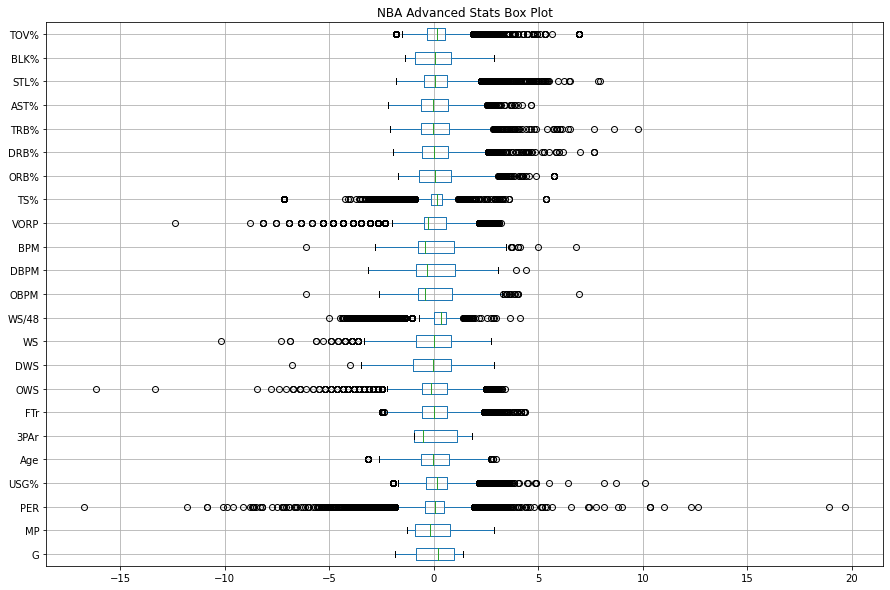

In [22]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NBA Advanced Stats Box Plot')
plt.show()

**_The data clearly has outliers. Lets see what 3 STD does_**

## 3 STD

In [23]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [24]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

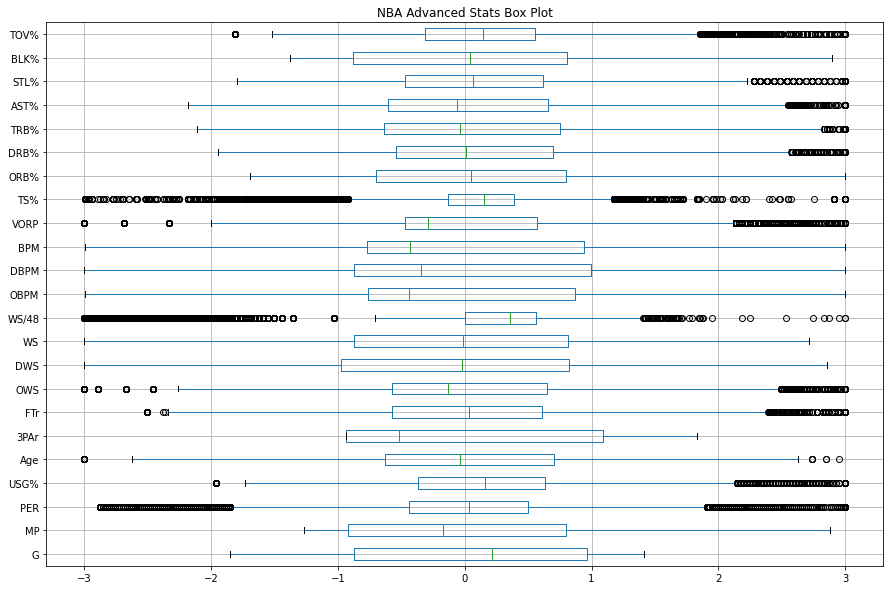

In [25]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NBA Advanced Stats Box Plot')
plt.show()

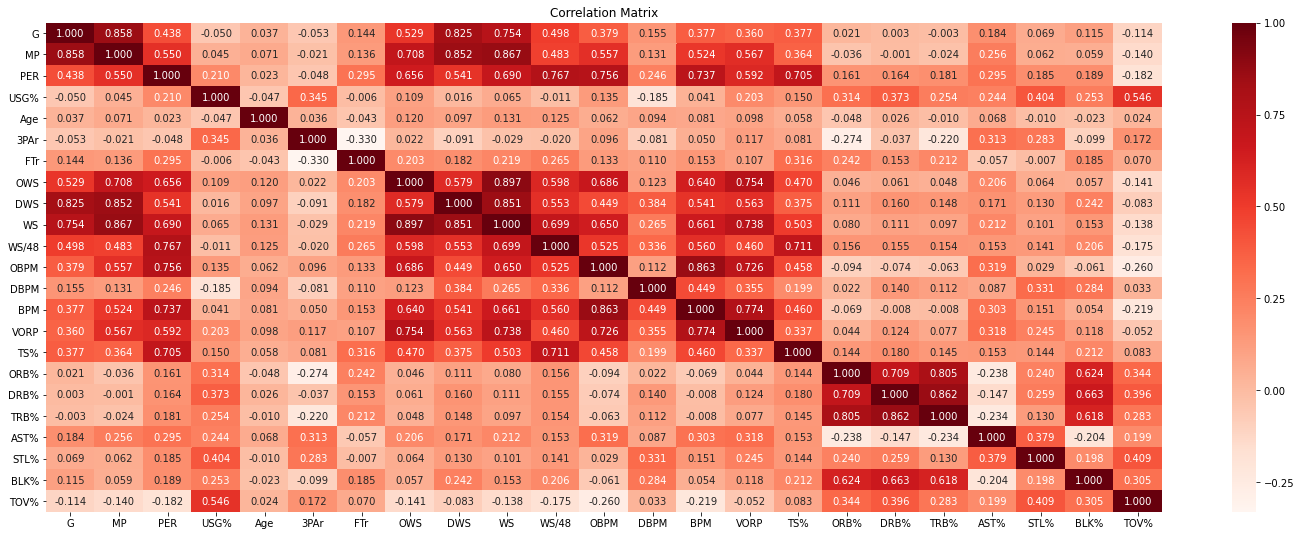

In [27]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(25, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [28]:
NBApipeline1=pd.concat([data_objects, data_num_zs], axis=1)

In [29]:
NBApipeline1.head()

,Player,Pos,Tm,Season,G,MP,PER,USG%,Age,3PAr,...,BPM,VORP,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%
0,Bam Adebayo,PF,MIA,2019-20,0.551087,1.120764,1.313764,0.548880,-1.325962,-0.692689,...,1.790051,1.845887,0.734104,0.832066,1.507171,1.358130,1.170480,0.353085,1.494971,0.629136
1,LaMarcus Aldridge,C,SAS,2019-20,0.101297,0.606174,1.183976,0.887205,1.664096,0.770502,...,1.383781,1.141793,0.522398,0.424212,0.722046,0.553944,0.066915,-0.356505,1.616278,-0.502719
2,Nickeil Alexander-Walker,SG,NOP,2019-20,-0.348494,-0.734329,-0.795286,0.790540,-1.719670,1.565334,...,-0.915684,-1.135714,-0.307251,-0.777508,0.417676,-0.070813,0.913336,-0.356505,0.415725,0.282187
3,Grayson Allen,SG,MEM,2019-20,-0.760802,-0.737538,-0.178794,0.198473,-0.631654,1.567652,...,-0.673177,-0.468622,0.558990,-1.032885,0.098590,-0.335712,0.111803,-0.848787,-0.881114,-0.136112
4,Jarrett Allen,C,BRK,2019-20,0.513605,0.491702,1.265094,-0.151934,-1.719670,-0.771857,...,1.555607,1.250756,1.041468,1.347979,1.507171,1.602864,-0.384108,-0.244942,1.597627,0.042377


In [30]:
NBApipeline1.to_csv('../../Capstone/Data/NBApipeline1.csv', index=0)

Features highly correlated to the target (WS):
G, MP, PER, OWS, DWS, WS/48, OBPM, BPM, VORP, TS%